<a href="https://colab.research.google.com/github/StevenXDiaz/AstroPersonalWebsite/blob/main/MSE233_PSET1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MS&E 233 (Spring 2025): Homework 1 (due April 15th, 8:00pm)

# Problem 1. Calculate Equilibrium of Zero-Sum Game (3 points)

Consider the zero-sum game defined by the game loss matrix:
\begin{align}
A = \begin{pmatrix} 0.5 & 0\\ 0 & 1\end{pmatrix}
\end{align}
and corresponding to the zero-sum game associated with the min-max problem:
\begin{align}
\min_{x\in \Delta(2)} \max_{y\in \Delta(2)} x^\top A y
\end{align}
with $\Delta(n)$, being the simplex in $n$-dimensions. Here $x$ is chosen by the minimizing (min-player) (aka the row-player or the $x$-player) and $y$ is chosen by the maximizing (max-player) (aka the column-player or the $y$-player). For any pair $(x,y)$ the loss of the min player is $x^\top A y$ and the loss of the max player is $-x^\top A y$.
Calculate analytically a Mixed Nash equilibrium $(x, y)$ for this game and showcase all the analytical math steps you took to arrive at this equilibrium.



Answer attached separately.

# Problem 2. Exponential Weight Updates


## Problem 2.1. No-regret dynamics (3 points)

Implement exponential weight updates algorithm and compute an approximate equilibrium of the game using no-regret dynamics where both players use the EXP algorithm to update their choice probabilities at each step. Use the template code we provide below and fill in the parts that we left as `{{FILL IN}}`

In [65]:
import numpy as np

# define zero sum game min_x max_y x'Ay
A = np.array([[.5, 0], [0, 1]])
# number of actions of each player
n, m = A.shape

# numberof iterations of no-regret dynamics
T = 10000
# step size for exponential weights for each of the two players
etax = 10 * np.sqrt(np.log(n)/(2 * T))
etay = 10 * np.sqrt(np.log(m)/(2 * T))

# initialize x, y to uniform probabilities over actions
# x, y will hold the probability of choice of each action for each player
# over the learning periods.
x, y = np.ones((T, n)) / n, np.ones((T, m)) / m
for t in np.arange(1, T):
    # calculate the expected loss vector for the x player,
    # given last choice of y, containing the expected loss
    # for each of the x-player's actions (.5 points)
    lx = A @ y[t - 1]
    # similalry, calculate the expected loss vector for y player,
    # given last choice of x (.5 points)
    ly = -A.T @ x[t - 1]
    # update probabilities for x player, based on Exponential Weight Updates
    # at the end x[t] should contain the probability of choice over actions
    # for player x (.5 points)
    x_weights = x[t-1] * np.exp(-etax * lx)
    x[t] = x_weights / np.sum(x_weights) # normalizing process
    # update probabilities for y player, based on Exponential Weight Updates
    # at the end y[t] should contain the probability of choice over actions
    # for player y (.5 points)
    y_weights = y[t-1] * np.exp(-etay * ly)
    y[t] = y_weights / np.sum(y_weights)

# calculate and print equilibrium pair of strategies as average of
# choice probabilities for each player over the learning periods (1 point)

x_mean = np.mean(x, axis=0)
y_mean = np.mean(y, axis=0)

print('x decision making:', x_mean, '\ny decision making:', y_mean)


x decision making: [0.66501199 0.33498801] 
y decision making: [0.66287095 0.33712905]


**Expected results.** You should be getting answers, approximately:
```
(array([0.66501199, 0.33498801]), array([0.66287095, 0.33712905]))
```

## Problem 2.2. Calculate Best-Response Gap and Plot Trajectories (3 points)

Calculate the best reponse gap of each player at the computed approximate equilibrium, i.e., how much players would gain by best responding, given that the other player remains fixed at each calculated equilibrium strategy.

In [66]:
# calculate the best response gap of x player
# at the computed approximate equilibrium (.5 points)
regret_min = x_mean @ A @ y_mean - np.min(A @ y_mean) # the min func picks which one would have least loss assuming x only picks one option continuously
# calculate the best response gap of y player
# at the computed approximate equilibrium (.5 points)
regret_max = -x_mean @ A @ y_mean + np.max(x_mean @ A) # flipped since rule of thumb: we want the regret to be positive
regret_min, regret_max

(np.float64(0.001907278323978412), np.float64(0.001645253777507849))

**Expected results.** You should be getting answers, approximately:
```
(np.float64(0.001907278323978412), np.float64(0.001645253777507849))
```

In [67]:
# print the theoretical worst-case upper bounds on the best response gap that
# we proved in class. These should be larger than the regrets you calculated above (.25 point)

worst_case_gap = 4 * np.sqrt(np.log(n) / T)
print("Worst-case theoretical best-response gap upper bound", worst_case_gap)

Worst-case theoretical best-response gap upper bound 0.03330218444630791


**Expected results.** You should be getting answers, approximately:
```
0.03330218444630791
```

Plot the trajectory of the probability of choosing action $1$ and the best-response gap (aka regret) of each player at each pair of choice probabilities $(x_t, y_t)$ of the dynamics. Does the trajectory converge to an equilibrium?

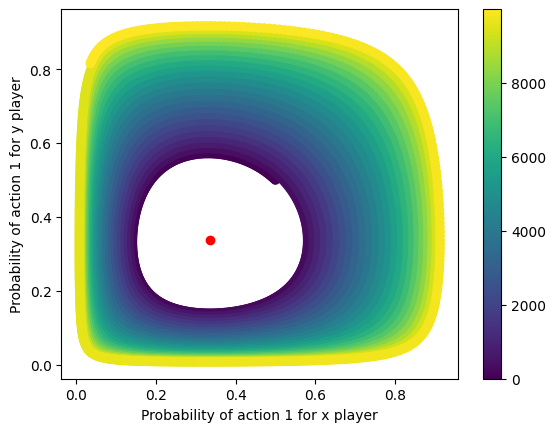

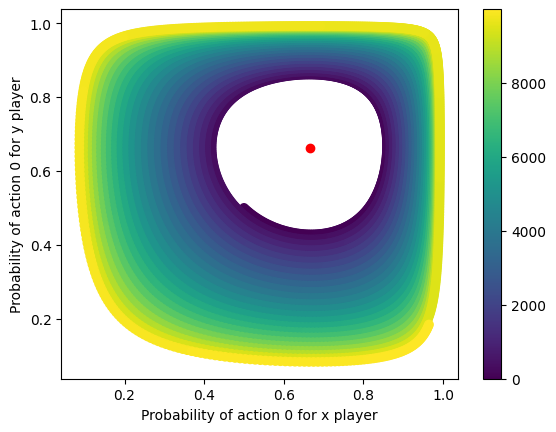

The trajectory does not converge to a single point as the changing strategies seem to do a circular motion around our optimal point, but the average of all the points does seem to converge about our optimal strategy values.


In [68]:
import matplotlib.pyplot as plt

# plot trajectory of probability of the action indexed by 1 for x and y
# players over periods t (note this is the second action of each player,
# since indices in python are {0, 1, ...})
plt.figure()
# create scatter plot of probability of action 1 for x player in the x axis and
# probability of action 1 for the y player in the y axis, over time.
# color code the plot with the time index using the argument `c= ...`
# for the scatterplot command. See below link for the scatter plot API:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
# (.5 point)

# Plotting action 1
plt.scatter(x[:, 1], y[:, 1], c=np.arange(T))
plt.xlabel('Probability of action 1 for x player')
plt.ylabel('Probability of action 1 for y player')
# also depict the equilibrium single point you calculated as the time average
# (.25 point)
plt.plot(x_mean[1], y_mean[1], 'ro')
plt.colorbar()
plt.show()

# Plotting action 0
plt.scatter(x[:, 0], y[:, 0], c=np.arange(T))
plt.xlabel('Probability of action 0 for x player')
plt.ylabel('Probability of action 0 for y player')

plt.plot(x_mean[0], y_mean[0], 'ro')
plt.colorbar()
plt.show()

print('The trajectory does not converge to a single point as the changing strategies seem to do a circular motion around our optimal point, but the average of all the points does seem to converge about our optimal strategy values.')

**Expected results.** You should be getting answers, approximately:

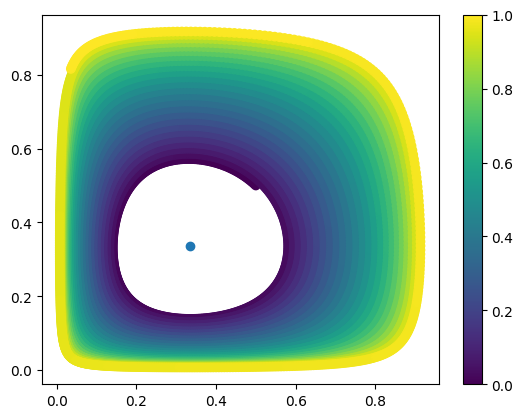

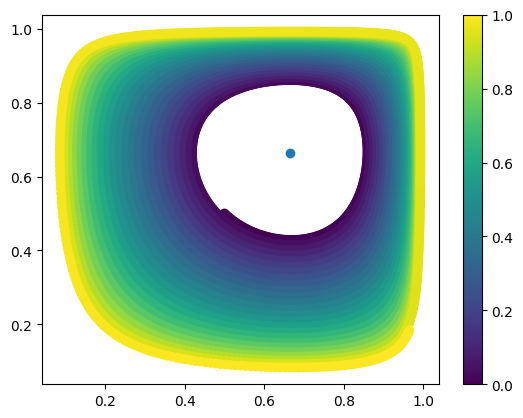

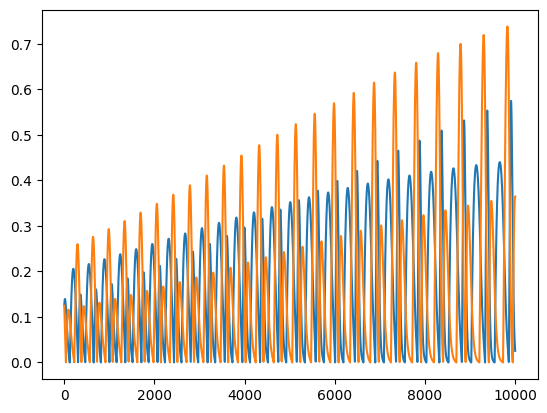

In [69]:
# plot best-response gap of each point in the trajectory for x player (.5)
plt.plot(np.arange(T), [ x[t] @ A @ y[t] - np.min(A @ y[t]) for t in range(T)])
# plot best-response gap of each point in the trajectory for y player (.5)
plt.plot(np.arange(T), [ -x[t] @ A @ y[t] + np.max(x[t] @ A) for t in range(T)])
plt.show()

**Expected results.** You should be getting answers, approximately:

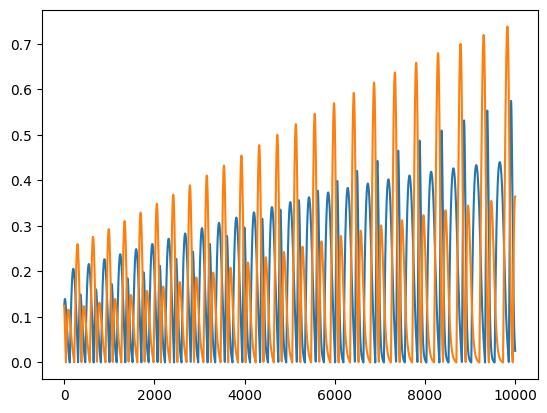

## Problem 2.3. Optimistic EXP Dynamics (4 points)

Repeat the above implementation but now have each player use the Optimistic MWU algorithm to update their choice probabilities. Report your answers to all questions above and comment on the difference in the trajectories and the regrets of players over time.

In [70]:
import numpy as np

# define zero sum game min_x max_y x'Ay
A = np.array([[.5, 0], [0, 1]])
# number of actions of each player
n, m = A.shape

# numberof iterations of no-regret dynamics
T = 10000
# step size for exponential weights
etax = 5 * np.sqrt(1/T)
etay = 5 * np.sqrt(1/T)

# initialize to uniform probabilities over actions
x, y = np.ones((T, n)) / n, np.ones((T, m)) / m
for t in np.arange(1, T):
    # calculate loss vector for x player, given last choice of y (.25 point)
    lx = A @ y[t-1]
    # calculate loss vector for x player, given second-to-last choice of y (.25 point)
    lx_pre = 2 * A @ y[t - 1] - A @ y[t - 2] if t > 1 else lx
    # loss vector for y player, given last choice of x (.25 point)
    ly = -x[t-1] @ A
    # calculate loss vector for x player, given second-to-last choice of y (.25 point)
    ly_pre = 2 * (-A.T @ x[t - 1]) + (A.T @ x[t - 2]) if t > 1 else ly
    # update probabilities for x player, based on Exponential Weight Updates
    # at the end x[t] should contain the probability of choice over actions
    # for player x (.5 points)
    x_weights = x[t - 1] * np.exp(-etax * lx_pre)
    x[t] = x_weights / np.sum(x_weights)
    # update probabilities for y player, based on Exponential Weight Updates
    # at the end y[t] should contain the probability of choice over actions
    # for player y (.5 points)
    y_weights = y[t - 1] * np.exp(-etay * ly_pre)
    y[t] = y_weights / np.sum(y_weights)


# calculate and print equilibrium pair of strategies as average of
# choice probabilities for each player over the learning periods (.5 points)
x_mean = np.mean(x, axis=0)
y_mean = np.mean(y, axis=0)

print('x decision making:', x_mean, '\ny decision making:', y_mean)

x decision making: [0.66750145 0.33249855] 
y decision making: [0.66607374 0.33392626]


**Expected results.** You should be getting answers, approximately:
```
(array([0.66750145, 0.33249855]), array([0.66607374, 0.33392626]))
```

In [71]:
# calculate the expected average regret of x player
# at the computed approximate equilibrium (.25 points)
regret_min = x_mean @ A @ y_mean - np.min(A @ y_mean)
# calculate the expected average regret of y player
# at the computed approximate equilibrium (.25 points)
regret_max = -x_mean @ A @ y_mean + np.max(x_mean @ A)
regret_min, regret_max

(np.float64(0.0002957191762002487), np.float64(0.00041813328907180924))

**Expected results.** You should be getting answers, approximately:
```
(np.float64(0.00029571917620008215), np.float64(0.00041813328907180924))
```

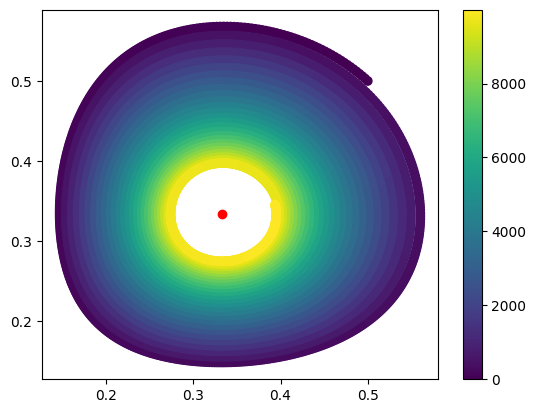

In [72]:
import matplotlib.pyplot as plt

# plot trajectory of probability of action 1, for x and y players over periods t
plt.figure()
# using scatter to plot the trajectory and color-code the dots in the trajectory
# using the iteration count (.25 points)
plt.scatter(x[:, 1], y[:, 1], c=np.arange(T))
plt.colorbar()
# also depict the equilibrium single point you calculated as the time average (.25 points)
plt.plot(x_mean[1], y_mean[1], 'ro')
plt.show()

**Expected results.** You should be getting answers, approximately:

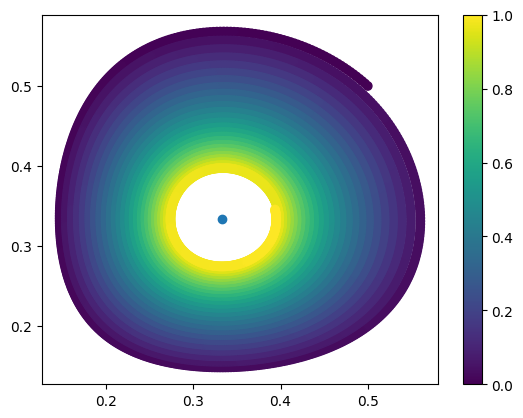

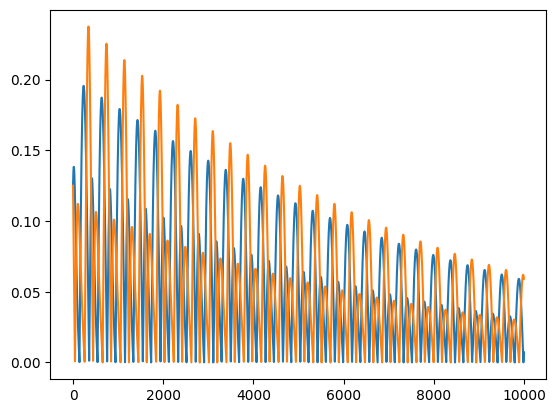

In [73]:
# plot best-response gap of each point in the trajectory of x player (.25 points)
plt.plot(np.arange(T), [(x[t] @ A @ y[t]) - np.min(A @ y[t]) for t in range(T)])
# plot best-response gap of each point in the trajectory of y player (.25 points)
plt.plot(np.arange(T), [np.max(x[t] @ A) - (x[t] @ A @ y[t]) for t in range(T)])
plt.show()

**Expected results.** You should be getting answers, approximately:

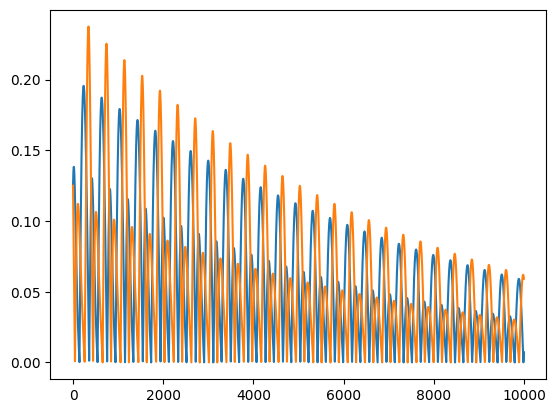